<a href="https://colab.research.google.com/github/SarvinSaravi/computer-vision-samples/blob/main/CNN_Autoencoder_Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoder in Keras

In [2]:
# @title setup and imports

import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist


In [3]:
# @title Dataloading

(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# @title Noramalization

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
# @title Reshaping

x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Exploratory Data Analysis
Visualization

In [30]:
# @title Randomly Select Input Image

index = np.random.randint(len(x_test))
index

2975

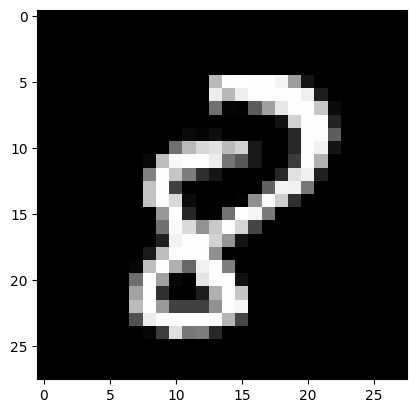

In [31]:
# @title Plot the Image

plt.imshow(x_test[index].reshape(28, 28))
plt.show()
# plt.gray()

# Model Creation

In [9]:
# @title Defining the Model

model = Sequential([
                   # Encoder Network
                   Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                   MaxPooling2D(2, padding='same'),
                   Conv2D(16, 3, activation='relu', padding='same'),
                   MaxPooling2D(2, padding='same'),

                   # Decoder Network
                   Conv2D(16, 3, activation='relu', padding='same'),
                   UpSampling2D(2),
                   Conv2D(32, 3, activation='relu', padding='same'),
                   UpSampling2D(2),

                   # Output Layer
                   Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# @title Train the Model

model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 114s 472ms/step - loss: 0.3015 - val_loss: 0.0903
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 135s 444ms/step - loss: 0.0873 - val_loss: 0.0799
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 446ms/step - loss: 0.0795 - val_loss: 0.0761
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 435ms/step - loss: 0.0765 - val_loss: 0.0743
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 451ms/step - loss: 0.0748 - val_loss: 0.0732
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 147s 472ms/step - loss: 0.0737 - val_loss: 0.0722
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 443ms/step - loss: 0.0726 - val_loss: 0.0716
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 441ms/step - loss: 0.0720 - val_loss: 0.0712
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 457ms/step - loss: 0.0713 - val_loss: 0.0706
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 441ms/step - loss: 0.0710 - val_loss: 0.0700
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 441ms/step - loss: 0.0704 - val_loss: 0.0696
Epoch 12

# Visualization


In [34]:
# @title Prediction (get Compressed Image)

pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


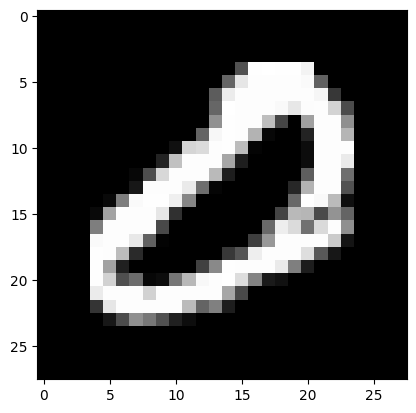

In [46]:
# @title Select Random Image

index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

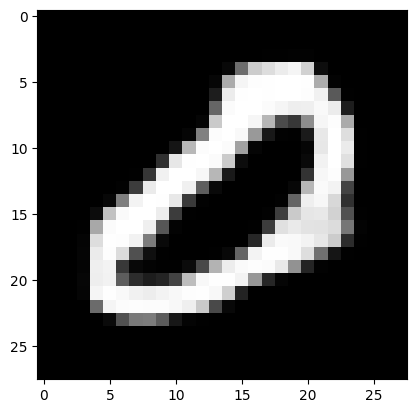

In [47]:
# @title Prediction Visualize

plt.imshow(pred[index].reshape(28, 28))
plt.gray()

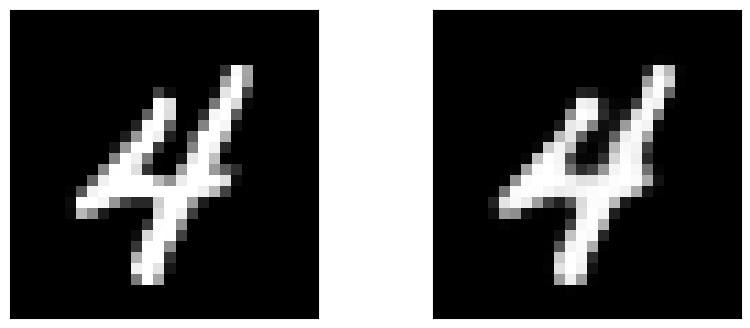

In [51]:
# @title Visualization Together

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))

# Display Original Image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display Compressed Image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

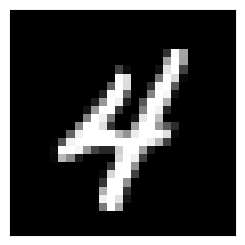

In [52]:
# @title Display Original Image

ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

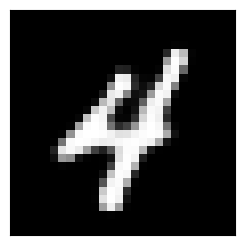

In [53]:
# @title Display Compressed Image

ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()